In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# KEZZEL KESZITETT PELDA

In [2]:
df = pd.DataFrame()
df['x'] = [10, 20, 30, 40, 50]

In [3]:
df['y'] = 10 + (5 * df['x'])
# y_pred = b0 + (b1 * x1)

In [4]:
df

,x,y
0,10,60
1,20,110
2,30,160
3,40,210
4,50,260


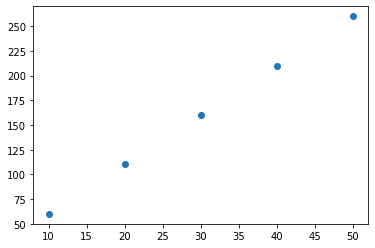

In [5]:
plt.scatter(df['x'], df['y'])

In [6]:
model = LinearRegression()

In [7]:
X = df.loc[:, ['x']]
y = df.loc[:, 'y']

In [8]:
X

,x
0,10
1,20
2,30
3,40
4,50


In [9]:
y

0     60
1    110
2    160
3    210
4    260
Name: y, dtype: int64

In [10]:
X.loc[0, 'x']

10

In [11]:
y.loc[0]

60

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
model.predict([[1]])

array([15.])

In [14]:
model.predict(X)

array([ 60., 110., 160., 210., 260.])

In [15]:
pred = model.predict(X)

In [16]:
pred

array([ 60., 110., 160., 210., 260.])

In [17]:
df['pred'] = pred

In [18]:
df

,x,y,pred
0,10,60,60.0
1,20,110,110.0
2,30,160,160.0
3,40,210,210.0
4,50,260,260.0


In [19]:
# y_pred = b0 * (b1 * x1)
# y_pred = 10 * (5 * x1)

In [20]:
model.intercept_

10.000000000000028

In [21]:
model.coef_

array([5.])

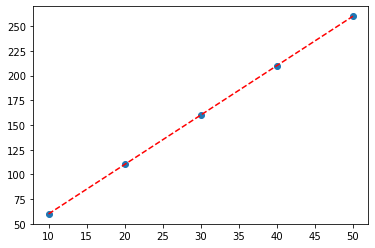

In [22]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], pred, color='red', ls='--')

In [23]:
mean_absolute_error(df['y'], df['pred'])

7.105427357601002e-15

In [24]:
mean_squared_error(df['y'], df['pred'])

1.3126645462877637e-28

In [25]:
mean_absolute_percentage_error(df['y'], df['pred'])

9.689219124001366e-17

# lakas pelda

In [26]:
df = pd.read_csv('./_data/ingatlan.csv')

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
0,Budapest,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,7,4.0
1,Budapest,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,8,14.0
2,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,9,14.0
3,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,11,2.0
4,Budapest,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,13,12.0


In [29]:
df.shape

(183565, 23)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183565 entries, 0 to 183564
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   county                   183565 non-null  object 
 1   city                     182261 non-null  object 
 2   postcode                 115475 non-null  float64
 3   property_type            183565 non-null  object 
 4   property_subtype         179925 non-null  object 
 5   property_condition_type  183565 non-null  object 
 6   property_floor           174499 non-null  object 
 7   building_floor_count     85776 non-null   object 
 8   view_type                100462 non-null  object 
 9   orientation              111423 non-null  object 
 10  garden_access            40679 non-null   object 
 11  heating_type             156879 non-null  object 
 12  elevator_type            150063 non-null  object 
 13  room_cnt                 183565 non-null  float64
 14  smal

In [31]:
df.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
count,115475.000000,183565.000000,182981.000000,183565.000000,175966.000000,183565.000000,183564.000000,183565.000000,183565.000000,176009.000000
mean,1103.395895,1.476393,0.547177,48.443984,7.748792,20.564001,262.264082,44.071593,196659.747942,9.730434
std,50.789818,0.972892,0.748810,12.776044,2360.665258,171.496565,556.838684,47.969011,113179.241269,4.782807
min,1011.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000
25%,1063.000000,1.000000,0.000000,40.000000,0.000000,13.200000,41.000000,11.000000,98117.000000,6.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,102.000000,28.000000,196774.000000,10.000000
75%,1141.000000,2.000000,1.000000,60.000000,3.000000,23.900000,265.000000,60.000000,294824.000000,13.000000
max,1239.000000,215.000000,56.000000,70.000000,990257.000000,41796.000000,40248.000000,544.000000,394178.000000,20.000000


In [32]:
df.describe(include='O')

,county,city,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,created_at
count,183565,182261,183565,179925,183565,174499,85776,100462,111423,40679,156879,150063,183565
unique,1,23,1,4,9,14,11,4,8,2,11,2,568
top,Budapest,Budapest XIV.,flat,brick flat (for sale),good,1,4,street view,east,none,konvection gas burner,yes,2015-10-20
freq,183565,20114,183565,133794,61823,34073,19855,40344,22735,34175,49623,81746,908


# CELVALTOZO

In [33]:
df['m2_price'] = (df['price_created_at'] / df['property_area'])*1e6

In [34]:
df['m2_price'].describe()

count    1.835650e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.880000e+05
50%      3.760000e+05
75%      4.923077e+05
max               inf
Name: m2_price, dtype: float64

In [35]:
df = df.loc[df['property_area']>0, :]
df = df.loc[df['price_created_at']>0, :]
df = df.reset_index(drop=True)

In [36]:
df.shape

(183449, 24)

In [37]:
df['m2_price'].describe()

count    1.834490e+05
mean     4.346854e+05
std      3.931615e+06
min      1.428571e+03
25%      2.876923e+05
50%      3.755556e+05
75%      4.916667e+05
max      7.954114e+08
Name: m2_price, dtype: float64

<AxesSubplot:>

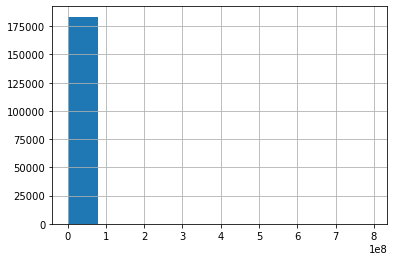

In [38]:
df['m2_price'].hist()

In [39]:
y_col = 'm2_price'
X_cols = ['property_area', 'room_cnt', 'small_room_cnt']

In [40]:
df.loc[:, X_cols].isnull().sum()

property_area       0
room_cnt            0
small_room_cnt    583
dtype: int64

In [41]:
df['small_room_cnt'] = df['small_room_cnt'].fillna(0)

In [42]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

In [43]:
X.isnull().sum()

property_area     0
room_cnt          0
small_room_cnt    0
dtype: int64

In [44]:
y.isnull().sum()

0

In [45]:
model = LinearRegression()

In [46]:
X_train = X.loc[:100000, :]
X_test = X.loc[100000:, :]

y_train = y.loc[:100000]
y_test = y.loc[100000:]

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
pred = model.predict(X_test)

In [49]:
pred_df = pd.DataFrame()
pred_df['y_true'] = y_test
pred_df['y_pred'] = pred

In [50]:
pred_df['ape'] = abs(pred_df['y_true'] - pred_df['y_pred']) / pred_df['y_true']

In [51]:
pred_df.sort_values('ape')

,y_true,y_pred,ape
130344,446153.846154,4.461705e+05,0.000037
144444,446153.846154,4.461705e+05,0.000037
139437,446153.846154,4.461705e+05,0.000037
183417,446153.846154,4.461705e+05,0.000037
166669,446153.846154,4.461705e+05,0.000037
...,...,...,...
119159,244615.384615,8.248327e+06,32.719576
137877,210000.000000,8.152641e+06,37.822099
105744,80000.000000,3.321687e+06,40.521091
115682,263636.363636,1.161892e+07,43.071781


In [52]:
mean_absolute_percentage_error(pred_df['y_true'], pred_df['y_pred'])

0.2976750823937458

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df.sample(2, random_state=2)

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district,m2_price
145499,Budapest,Budapest IV.,1041.0,flat,prefabricated panel flat (for sale),renewed,8,10,courtyard view,south-west,none,district heating,yes,1.0,1.0,2016-03-31,35.0,0.0,12.9,121.0,4.0,311332,4.0,368571.428571
168841,Budapest,Budapest XXII.,NaN,flat,prefabricated panel flat (for sale),good,9,10,NaN,NaN,NaN,NaN,yes,2.0,1.0,2016-06-06,60.0,0.0,17.9,240.0,85.0,361082,NaN,298333.333333


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
pred = model.predict(X_test)

In [58]:
mean_absolute_percentage_error(y_test, pred)

0.40225550388607745

In [59]:
from sklearn.model_selection import cross_val_predict

In [60]:
pred = cross_val_predict(model, X, y, cv=4)

In [61]:
mean_absolute_percentage_error(y, pred)

0.40390086834265493

In [62]:
df['pred'] = pred

In [63]:
df['ape'] = abs(df['m2_price'] - df['pred']) / df['m2_price']

In [64]:
df['ape'].mean()

0.40390086834264777

In [65]:
df['ape'].describe()

count    183449.000000
mean          0.403901
std           0.997893
min           0.000015
25%           0.145566
50%           0.308891
75%           0.540069
max         266.394823
Name: ape, dtype: float64

<AxesSubplot:ylabel='property_subtype'>

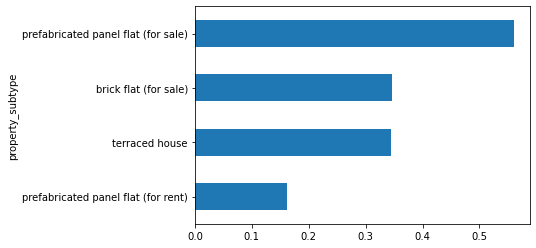

In [66]:
df.groupby('property_subtype')['ape'].mean().sort_values().plot(kind='barh')

In [67]:
df['property_subtype'].value_counts(dropna=False)

brick flat (for sale)                  133687
prefabricated panel flat (for sale)     46121
NaN                                      3638
terraced house                              2
prefabricated panel flat (for rent)         1
Name: property_subtype, dtype: int64

In [68]:
df = df.loc[df['property_subtype'].isin(['brick flat (for sale)', 'prefabricated panel flat (for sale)'])]
df = df.reset_index(drop=True)

In [69]:
df['property_subtype'] = df['property_subtype'].apply(lambda x: 1 if x == 'brick flat (for sale)' else 0)

In [70]:
['a', 'b'] + ['c']

['a', 'b', 'c']

In [71]:
X_cols = X_cols + ['property_subtype']

In [72]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

In [73]:
pred = cross_val_predict(model, X, y, cv=4)

In [74]:
mean_absolute_percentage_error(y, pred)

0.3514066141607262

# coef_df

In [75]:
model.coef_

array([-10087.13285384, 189859.04820794,  72058.48854799])

In [76]:
model.fit(X, y)

LinearRegression()

In [77]:
coef_df = pd.DataFrame()

In [78]:
coef_df['col_name'] = X.columns
coef_df['coef'] = model.coef_

In [79]:
coef_df

,col_name,coef
0,property_area,-5717.057255
1,room_cnt,100328.706676
2,small_room_cnt,63404.481380
3,property_subtype,191118.070927


# coef_df calc

jelenlegi peldaban nem figyeltunk arra h korrelalnak-e egymassal az egyes egyutthatok pedig kene am

In [80]:
example_row = df.loc[:, X_cols].sample(1, random_state=1)

In [81]:
example_row_transposed = example_row.loc[:, X_cols].T

In [82]:
coef_df['example'] = example_row_transposed.reset_index(drop=True)

In [83]:
coef_df['example_calc'] = coef_df['example'] * coef_df['coef']

In [84]:
coef_df['example_calc'].sum() + model.intercept_

281685.2769582381

In [85]:
# model.predict(df.loc[:, X_cols].sample(1, random_state=1))
model.predict(example_row)

array([281685.27695824])